<a href="https://colab.research.google.com/github/thnhpht/phantichdulieu_hocsau/blob/main/Identifying_traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
import wget
import pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import numpy as np


In [6]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
cd /content/drive/My Drive/Identifying_traffic_sign

/content/drive/My Drive/Identifying_traffic_sign


In [8]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [9]:
wget.download(link)

'traffic-signs-data (1).zip'

In [10]:
data = "./"

In [11]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [12]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [13]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [14]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [15]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [16]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [17]:
trainX = train["features"]
trainY = train["labels"]

In [18]:
trainX.shape

(34799, 32, 32, 3)

In [19]:
trainX[0].shape

(32, 32, 3)

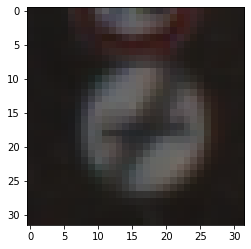

In [20]:
plt.imshow(trainX[0])

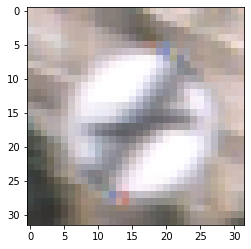

In [21]:
plt.imshow(trainX[50])

In [22]:
trainY[50]

41

In [23]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [24]:
classNames[trainY[50]]

'End of no passing'

In [25]:
trainX, trainY = shuffle(trainX, trainY)

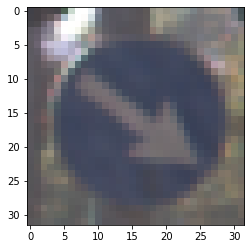

In [26]:
plt.imshow(trainX[0])

In [27]:
classNames[trainY[0]]

'Keep right'

In [28]:
validX = valid["features"]
validY = valid["labels"]

In [29]:
testX = test["features"]
testY = test["labels"]

In [30]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [31]:
trainX[0]

array([[[0.25490196, 0.25490196, 0.28235294],
        [0.27058824, 0.25490196, 0.27058824],
        [0.29803922, 0.2745098 , 0.29019608],
        ...,
        [0.59215686, 0.54509804, 0.54509804],
        [0.44705882, 0.47843137, 0.50980392],
        [0.27843137, 0.32156863, 0.3372549 ]],

       [[0.2627451 , 0.25882353, 0.28235294],
        [0.27058824, 0.25490196, 0.27058824],
        [0.3254902 , 0.29411765, 0.31372549],
        ...,
        [0.54117647, 0.51372549, 0.52156863],
        [0.47843137, 0.49411765, 0.51764706],
        [0.30196078, 0.34509804, 0.35294118]],

       [[0.28235294, 0.27843137, 0.29803922],
        [0.30196078, 0.29019608, 0.30588235],
        [0.40392157, 0.37647059, 0.42352941],
        ...,
        [0.55686275, 0.50980392, 0.5372549 ],
        [0.59215686, 0.55686275, 0.58823529],
        [0.50980392, 0.50588235, 0.5254902 ]],

       ...,

       [[0.34901961, 0.32941176, 0.3372549 ],
        [0.4       , 0.35686275, 0.36078431],
        [0.4627451 , 0

In [32]:
lb = LabelBinarizer()

In [33]:
trainY = lb.fit_transform(trainY)

In [34]:
validY = lb.fit_transform(validY)

In [35]:
valid["labels"]

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [36]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [37]:
model = Sequential()

In [38]:
width = 32
height = 32
classes = 43

In [39]:
shape = (width, height, 3)

In [40]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [41]:
model.add(Activation("relu"))

In [42]:
model.add(BatchNormalization())

In [43]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [44]:
model.add(Activation("relu"))

In [45]:
model.add(BatchNormalization())

In [46]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [47]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [48]:
model.add(Activation("relu"))

In [49]:
model.add(BatchNormalization())

In [50]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [51]:
model.add(Activation("relu"))

In [52]:
model.add(BatchNormalization())

In [53]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
model.add(Flatten())

In [55]:
model.add(Dense(512))

In [56]:
model.add(Activation("relu"))

In [57]:
model.add(BatchNormalization())

In [58]:
model.add(Dense(classes))

In [59]:
model.add(Activation("softmax"))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                        

In [61]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [62]:
learning_rate = 0.01

In [63]:
epochs = 10
batch_size = 64

In [64]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [65]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
543/543 [==============================] - 241s 441ms/step - loss: 2.0405 - accuracy: 0.4087 - val_loss: 2.3249 - val_accuracy: 0.3923
Epoch 2/10
543/543 [==============================] - 241s 445ms/step - loss: 0.8245 - accuracy: 0.7279 - val_loss: 1.2740 - val_accuracy: 0.6091
Epoch 3/10
543/543 [==============================] - 241s 443ms/step - loss: 0.3681 - accuracy: 0.8809 - val_loss: 1.0882 - val_accuracy: 0.7204
Epoch 4/10
543/543 [==============================] - 241s 443ms/step - loss: 0.2027 - accuracy: 0.9351 - val_loss: 0.6545 - val_accuracy: 0.8079
Epoch 5/10
543/543 [==============================] - 240s 442ms/step - loss: 0.1441 - accuracy: 0.9547 - val_loss: 0.5609 - val_accuracy: 0.8488
Epoch 6/10
543/543 [==============================] - 245s 452ms/step - loss: 0.1029 - accuracy: 0.9686 - val_loss: 0.6344 - val_accuracy: 0.8451
Epoch 7/10
543/543 [==============================] - 242s 445ms/step - loss: 0.0813 - accuracy: 0.9744 - val_loss: 0.5631 -

In [ ]:
saved_model = tf.keras.models.load_model("identifying_traffic_sign.h5")

In [ ]:
sign = 42
result = saved_model.predict(testX[sign:sign+1])

In [ ]:
result

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

In [ ]:
plt.imshow(test["features"][sign])